# Feature extraction on image level

In [ ]:
# Get repo, prepare some images

if True:      
  !rm -rf fyp2022-imaging
  !git clone https://github.com/vcheplygina/fyp2022-imaging.git


import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

# Function to get us some example images and their masks, and resize them 
def prepare_im(im_id):

  path = 'fyp2022-imaging/data/'

  im = plt.imread(path + 'example_image/' + im_id + '.jpg')
  im = resize(im, (im.shape[0] // 4, im.shape[1] // 4), anti_aliasing=True)
 
  gt = plt.imread(path + 'example_segmentation/' + im_id + '_segmentation.png')
  gt = resize(gt, (gt.shape[0] // 4, gt.shape[1] // 4), anti_aliasing=False) #Setting it to True creates values that are not 0 or 1


  return im, gt



Cloning into 'fyp2022-imaging'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325
Receiving objects: 100% (325/325), 825.97 MiB | 17.89 MiB/s, done.
Resolving deltas: 100% (94/94), done.
Updating files: 100% (309/309), done.


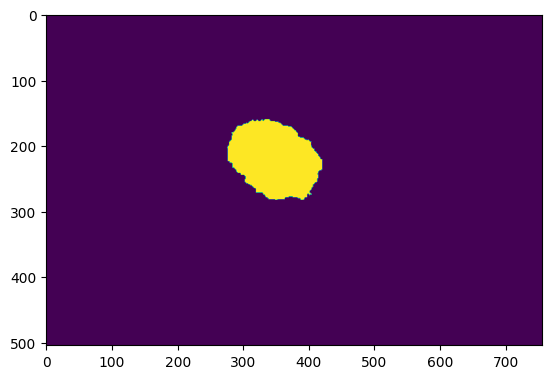

In [ ]:
# I do not call the masks ground truth here, because you can also measure features based on your own masks

im1, mask1 = prepare_im('ISIC_0001871')
im2, mask2 = prepare_im('ISIC_0012151')

plt.imshow(mask1, cmap='gray')

# Measure features based on the mask

3.3655360292265053


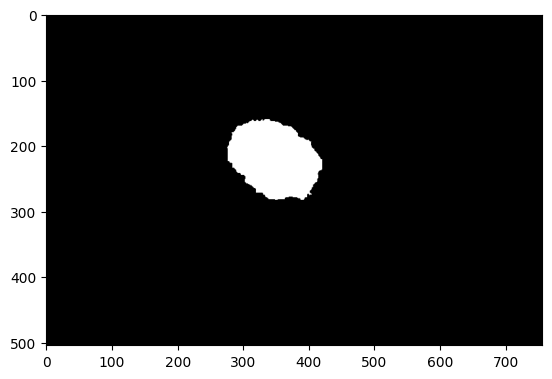

In [ ]:
plt.imshow(mask1, cmap='gray')

#Total size of the image
total = mask1.shape[0] * mask1.shape[1] 

#Size of mask only
area = np.sum(mask1)

#As percentage
print(area/total*100)

In [ ]:
# Measure diameter of the lesion: measure height or width of the mask

#How many 1's in each column of the image (sum over axis 0, i.e. rows)
pixels_in_col = np.sum(mask1, axis=0)
print(mask1.shape)
print(pixels_in_col.shape)


#Without this there are some non zeros and ones still because of the resizing
pixels2 = pixels_in_col > 0
pixels2 = pixels2.astype(np.int8)

print(pixels2)


#this is how we measure the diameter
max_pixels_in_col = np.max(pixels_in_col)
print('height is', max_pixels_in_col)

# pixels_in_row = 

(504, 756)
(756,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

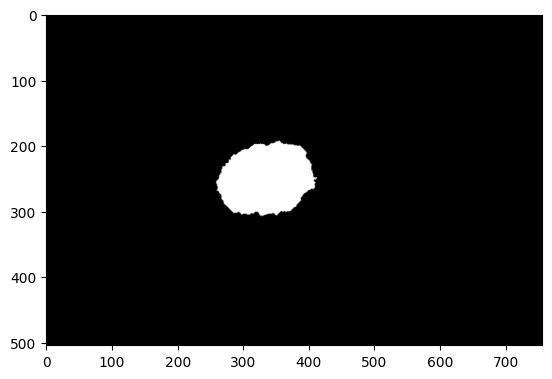

In [ ]:
# Measuring the diameter at an angle

# General rule of thumb - create a simpler image first, then do the measurement

from skimage import transform
rot_im = transform.rotate(mask1, 45)
plt.imshow(rot_im, cmap='gray')

# Now we can measure as before by counting pixels in rows/columns...

# Find perimeter using morphology

How to find all the pixels on the perimeter of the lesion?

Again here, rule of thumb applies: first we create the image, then do a simple measurement

12823.5
11579


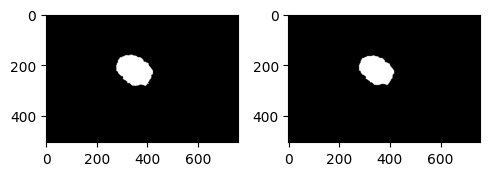

In [ ]:
from skimage import morphology

#Structural element, that we will use as a "brush" on our mask
struct_el = morphology.disk(3)

# Use this "brush" to erode the image - eat away at the borders
mask_eroded = morphology.binary_erosion(mask1, struct_el)

# Show side by side (depending on brush size, you might not see a difference visually)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
axes[0].imshow(mask1, cmap='gray')
axes[1].imshow(mask_eroded, cmap='gray')
fig.tight_layout()

# Verify the new mask is smaller
print(area)
print(np.sum(mask_eroded))



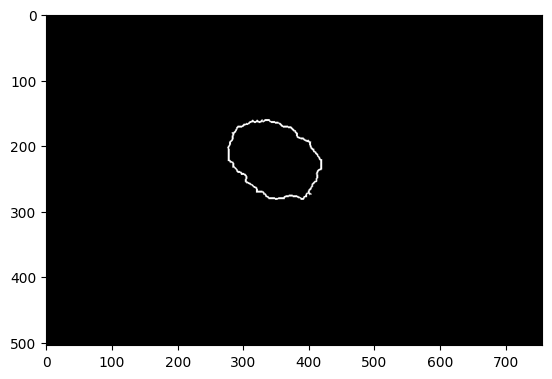

In [ ]:
# Now we can find the pixels that have value 1 in the original mask but not in the eroded mask

perimeter_im = mask1 - mask_eroded

plt.imshow(perimeter_im, cmap='gray')


In [ ]:
# The perimeter now is just the sum of the mask

print(np.sum(perimeter_im))
# Note that the number of pixels will change based on what structural element you use



1244.5


# Finding regions with similar colors

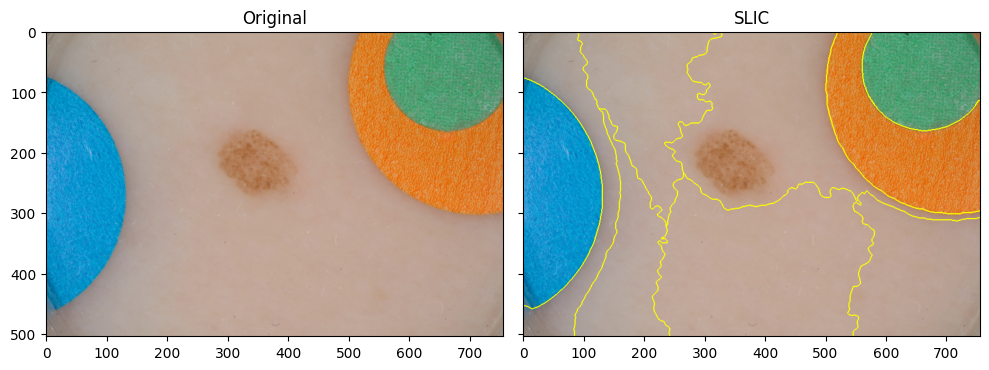

In [ ]:
# SLIC clustering - see also https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_segmentations.html

from skimage.segmentation import slic, mark_boundaries

example_im = im1

# Divide the pixels into segments of similar color
segments_slic = slic(example_im, n_segments=10, compactness=3, sigma=3, start_label=1)


# Show the results
fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0].imshow(example_im)
ax[0].set_title("Original")

ax[1].imshow(mark_boundaries(example_im, segments_slic))
ax[1].set_title('SLIC')

plt.tight_layout()
plt.show()

# What kind of features can you now measure, combining this with the mask?

# General purpose features

In [ ]:
from skimage import feature #for feature extraction

#Extract feature images
feat_im = feature.multiscale_basic_features(im1, channel_axis=2, intensity=False, edges=True, texture=True, sigma_min = 3, sigma_max = 3)
print(feat_im.shape)





(504, 756, 9)


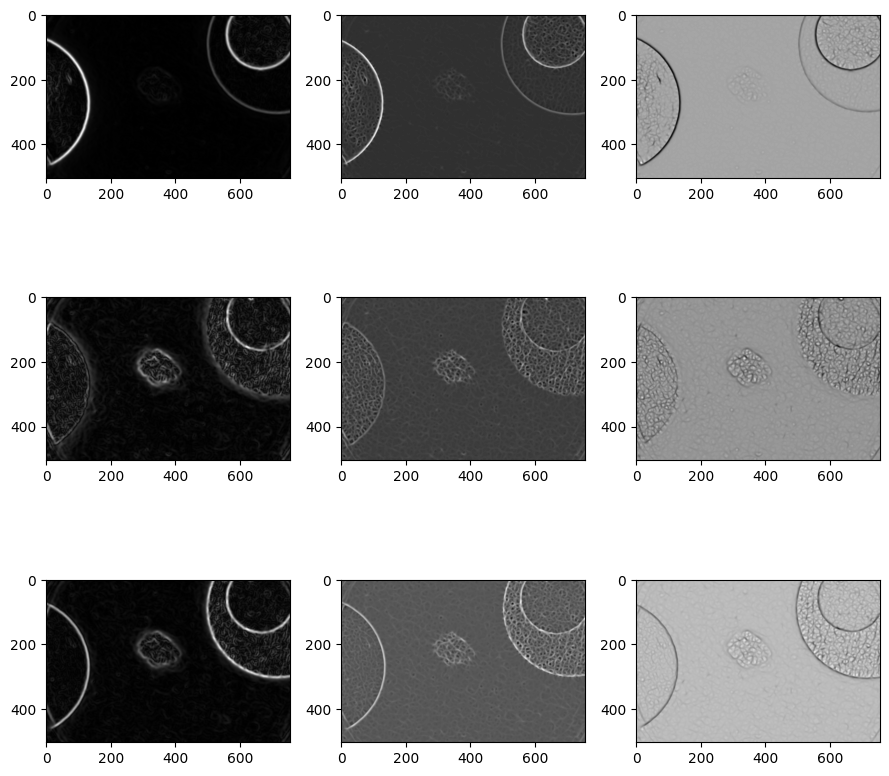

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(9, 9))

for i, ax in enumerate(axs.ravel()):
  ax.imshow(feat_im[:,:,i], cmap='gray')

plt.tight_layout()
plt.show()



(12779,)
[   9   96  516 2423 3905 2273 1502  987  512  271  107   82   57   24
    8    7]


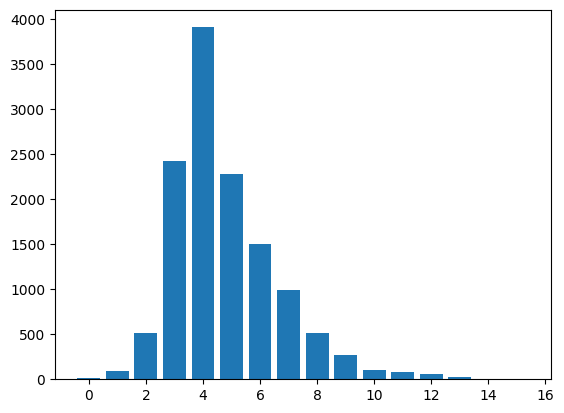

In [ ]:
# For classification, we need features per IMAGE

# Combine the outputs for the lesion pixels for one feature type into a vector

feat1 = feat_im[:,:,1]
lesion_feat1 = feat1[mask1==1]
print(lesion_feat1.shape)

feat_vec, bin_edges = np.histogram(lesion_feat1, bins=16)

plt.bar(np.arange(0,16), feat_vec)
print(feat_vec)

# Now this feature image is summarized by 16 numbers 

In [ ]:
# Many pixels fall into the same bin because we just split all intensities into 16 groups
# We can adjust the bins, so the distribution of pixels is more equal 

# Find quantiles of the pixel values (25% of the values goes into the same bin)
quantile_bins = np.quantile(lesion_feat1*256, np.arange(0,1,0.25))

# These bins have different widths
print(quantile_bins)
#print('{:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(quantile_bins[0], quantile_bins[1], quantile_bins[2], quantile_bins[3]))


[-0.21670189  0.00920049  0.05334749  0.13002649]
-0.22, 0.01, 0.05, 0.13


In [ ]:
# For a specific feature, the bins must be the same across images!

# Define bins once on "representative image" (how?), then use for all images

# Visualizing features

In [ ]:
import pandas as pd      #Since we want to work with multiple images, we will be using pandas

# Load example features and labels
file_data = 'fyp2022-imaging/data/example_ground_truth.csv'
file_features = 'fyp2022-imaging/features/features.csv'

df = pd.read_csv(file_data)
features = pd.read_csv(file_features)
df['area'] = features['area']
df['perimeter'] = features['perimeter']

print(df.head())



       image_id  melanoma  seborrheic_keratosis      area  perimeter
0  ISIC_0001769       0.0                   0.0  216160.0     2013.0
1  ISIC_0001852       0.0                   0.0  130493.0     1372.0
2  ISIC_0001871       0.0                   0.0  205116.0     1720.0
3  ISIC_0003462       0.0                   0.0  161705.0     1344.0
4  ISIC_0003539       0.0                   0.0  317040.0     2063.0


In [ ]:
# Scale features to the same mean and standard deviation

# Let's scale the features
from sklearn import preprocessing

cols = ['area','perimeter']

df_numeric = df[cols]

#Fit scaler on our data
scaler = preprocessing.StandardScaler().fit(df_numeric)

#Apply to data itself - this does not keep the data frame information
values_numeric = scaler.transform(df_numeric)

df_numeric = pd.DataFrame(values_numeric, columns=cols)

#Put back into the original dataframe
df['area'] = df_numeric['area']
df['perimeter'] = df_numeric['perimeter']



<Axes: >

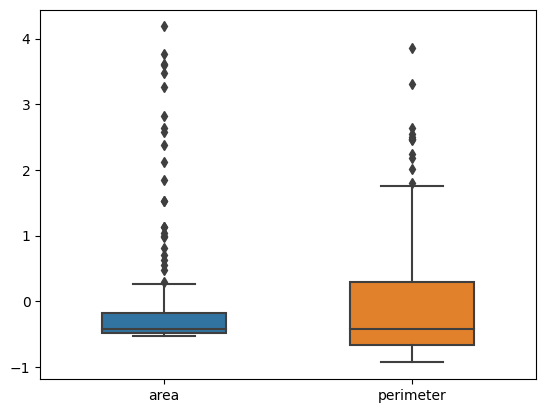

In [ ]:
# Plots of single features

import seaborn as sns           # A visualization package

sns.boxplot(data=df[['area','perimeter']], width=0.5)

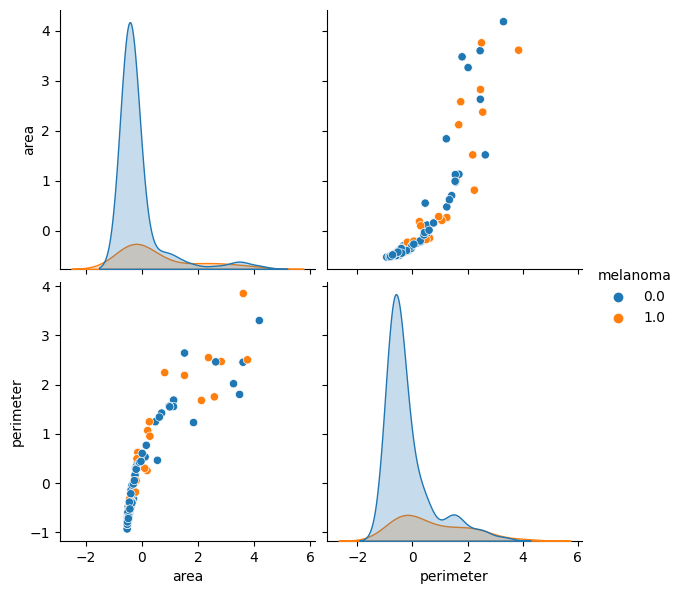

In [ ]:
# Look at values per class
sns.pairplot(df[['area','perimeter','melanoma']], hue="melanoma", height=3)

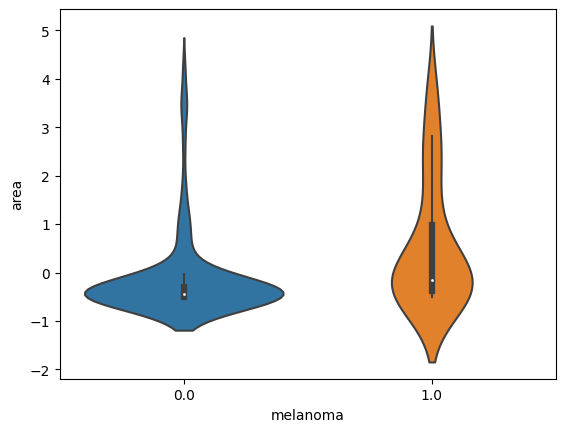

In [ ]:
# A plot showing distribution differences for a single feature

ax = sns.violinplot(df[['area','perimeter','melanoma']], x="melanoma", y="area", size=8)